# Displaying multiple overlaid density plots

## Overview

This is a simple example showing how overlaying multiple density plots can be used<br>
to visualize sampling variability when drawing from a single distribution.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotnine import aes, geom_density, ggplot
from scipy.stats import weibull_min

In [2]:
num_samples = 50
num_iterations = 20
shape = 1.1

In [3]:
data = {}
for idx in range(num_iterations):
    iter_num = f"0{idx + 1}" if idx < 9 else idx + 1
    data[f"iter_{iter_num}"] = weibull_min.rvs(c=shape, size=num_samples)

In [4]:
df = pd.DataFrame(data)
df["id"] = range(num_samples)
df = df.melt(id_vars=["id"], value_vars=[col for col in data.keys()])
df.head()

,id,variable,value
0,0,iter_01,1.180897
1,1,iter_01,1.544933
2,2,iter_01,0.105276
3,3,iter_01,2.485722
4,4,iter_01,0.269782


## Plotting with seaborn

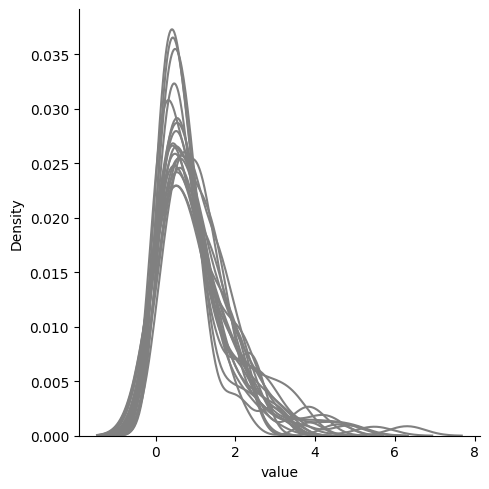

In [5]:
palette = sns.color_palette(["grey"], len(df["variable"].unique()))
fig = sns.displot(
    df,
    x="value",
    hue="variable",
    kind="kde",
    color="blue",
    palette=palette,
    legend=False,
)
plt.show()

## Plotting with plotnine

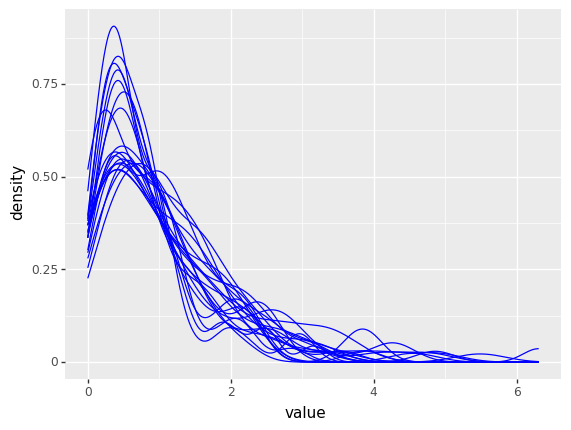

<ggplot: (155339773838)>

In [6]:
(ggplot(df, aes(x="value", group="variable")) + geom_density(color="blue"))